In [228]:
%matplotlib inline
import numpy as nm 
import matplotlib.pyplot as mpt
mpt.rcParams['figure.figsize'] = (10.0,5.0)
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#### The raw data

In [229]:
data_set = pd.read_csv('city_day.csv/city_day.csv')
data_set.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [230]:
data_set.shape #gives the number of columns and rows

(29531, 16)

In [231]:
data_set.info   #gives the compressed data

<bound method DataFrame.info of                 City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Be

### Handling Missing Data

<AxesSubplot:>

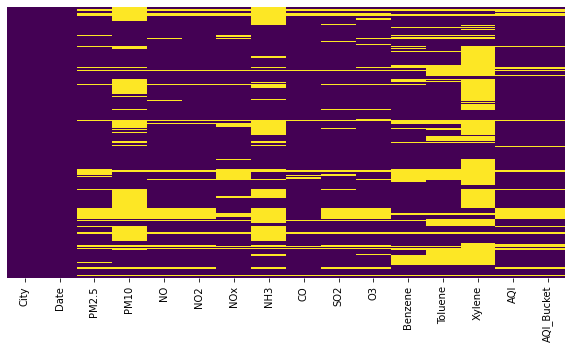

In [232]:
#Heatmap of the raw data set
#The yellow regions indicate the null values in the data
sns.heatmap(data_set.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [233]:
#The no. of null values in all columns
data_set.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [234]:
#We drop the 'Date' column to make the index of the 'City' column 0
data_set=data_set.drop(columns='Date',axis=1)

##### We will replace the null values with mean values of each parameter, city-wise

In [235]:
#This operation is done on columns 'PM2.5' to 'AQI'
data_set.iloc[:, 1:14] = data_set.groupby('City').transform(lambda x: x.fillna(x.mean()))

C:\Users\Ananya\AppData\Local\Temp\ipykernel_1192\2540781499.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  data_set.iloc[:, 1:14] = data_set.groupby('City').transform(lambda x: x.fillna(x.mean()))


<AxesSubplot:>

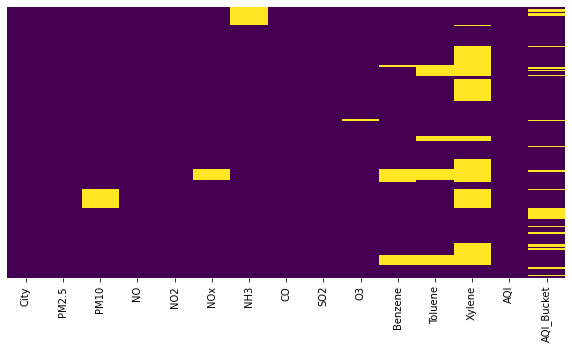

In [236]:
sns.heatmap(data_set.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### Replacing null values that still remained as the data for entire city was missing

From the plot, it can be seen that the following columns still contained null values

In [237]:

data_set['PM10'].fillna(data_set['PM10'].mean(),inplace=True)
data_set['NH3'].fillna(data_set['NH3'].mean(),inplace=True)
data_set['NOx'].fillna(data_set['NOx'].mean(),inplace=True)
data_set['Benzene'].fillna(data_set['Benzene'].mean(),inplace=True)
data_set['Toluene'].fillna(data_set['Toluene'].mean(),inplace=True)
data_set['Xylene'].fillna(data_set['Xylene'].mean(),inplace=True)
data_set['O3'].fillna(data_set['O3'].mean(),inplace=True)

In [238]:
data_set

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.000000,0.020000,0.000000,452.122939,NaN
1,Ahmedabad,67.854497,114.584029,0.97,15.69,16.46,23.024137,0.97,24.55,34.06,3.680000,5.500000,3.770000,452.122939,NaN
2,Ahmedabad,67.854497,114.584029,17.40,19.30,29.70,23.024137,17.40,29.07,30.70,6.800000,16.400000,2.250000,452.122939,NaN
3,Ahmedabad,67.854497,114.584029,1.70,18.48,17.97,23.024137,1.70,18.59,36.08,4.430000,10.140000,1.000000,452.122939,NaN
4,Ahmedabad,67.854497,114.584029,22.10,21.42,37.76,23.024137,22.10,39.33,39.31,7.010000,18.890000,2.780000,452.122939,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.000000,Good
29527,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.000000,Satisfactory
29528,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.000000,Satisfactory
29529,Visakhapatnam,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.000000,0.000000,0.000000,54.000000,Satisfactory


<AxesSubplot:>

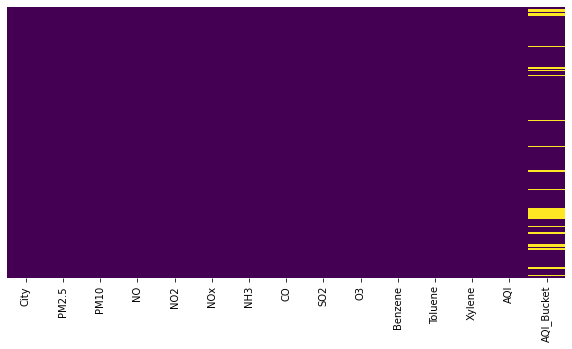

In [239]:
sns.heatmap(data_set.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### Now only the AQI bucket values need to be determined. The AQI bucket can be determined by the following criteria:
| AQI | AQI bucket |
 :---: | :---: |
 | 0-50 | Good |
 | 51-100|Satisfactory|
 |101-200|Moderately Polluted|
 |201-300|Poor|
 |301-400|Very Poor|
 |401-500|Severe|



In [240]:
#Defining a function which returns the AQI bucket by taking the AQI value as input
def AQI_bucket(n: int) -> int:
    if n > 0 and n <= 50:
        return 'Good'
    elif n > 50 and n <= 100:
        return 'Satisfactory'
    elif n > 100 and n <= 200:
        return 'Moderately Polluted'
    elif n > 200 and n <= 300:
        return 'Poor'
    elif n > 300 and n <= 400:
        return 'Very Poor'
    elif n > 400:
        return 'Severe'
    else:
        return '0'

In [241]:
#Replacing the null values in AQI_Bucket column with appropriate values
data_set['AQI_Bucket'] = data_set['AQI_Bucket'].fillna(data_set['AQI'].apply(lambda x: AQI_bucket(x)))

<AxesSubplot:>

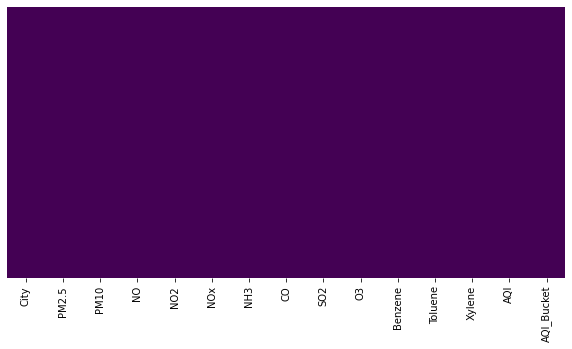

In [244]:
sns.heatmap(data_set.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### The above plot shows that the dataset is now clean and we can proceed with the next step.

##### Now we can apply different Machine Learning Models on our data.


### **Linear Regression**

In linear regression, a dependent variable (In this case, the AQI value) is plotted against one or more independent variables (In this case, the pollutants). A best-fit line is found out such that the difference between the predicted values of the dependent variable and its actual values is minimum.

In this problem statement, since there are multiple independent variables, we will express the dependent variable in the following form:

*y* = <i>m<sub>1</sub>*x<sub>1</sub> + m<sub>2</sub>*x<sub>2</sub> + m<sub>3</sub>*x<sub>3</sub> + m<sub>4</sub>*x<sub>4</sub> ... + b</i>

where *y* is the AQI value, *x<sub>1</sub>,x<sub>2</sub>,...* are the concentration of pollutants, *m<sub>1</sub>, m<sub>2</sub>, ...* are the coefficients of the independent variables which accounts for the dependency of *y* on them and *b* is the intercept.

In [245]:
Y = data_set.AQI    #the dependent variable
X = data_set[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']] #the independent variables

In [246]:
#Creating a Linear Regression class
reg = linear_model.LinearRegression()
reg.fit(X,Y)


LinearRegression()

In [247]:
reg.coef_  #Gives the values of m1, m2, m3..

array([ 0.96979104,  0.28795402, -0.0678072 ,  0.32199565,  0.12390852,
        0.06471898, 10.79993249,  0.71220266,  0.18678752, -0.22553228,
        0.1545539 , -0.07475551])

In [248]:
reg.intercept_   #Gives the value of b

12.272321659750162

In [249]:
#Gives the predicted AQI value based on particular values of xi
Y_pred = reg.predict([[67.854497,114.584029,0.92,18.22,17.15,23.024137,0.92,27.64,133.36,0.000000,0.020000,0.000000]])
print(Y_pred)
print(AQI_bucket(Y_pred))

[175.02573912]
Moderately Polluted


c:\Users\Ananya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [250]:
#We can see that the calculated value and value obtained by the algorithm are very close
-0.07475551*0.000000 + 0.1545539*0.020000 + -0.22553228*0.000000 + 0.18678752*133.36 + 27.64*0.71220266 + 0.92*10.79993249 + 23.024137*0.06471898 + 17.15*0.12390852 +18.22* 0.32199565 + 0.92*-0.0678072 + 114.584029*0.28795402 + 67.854497*0.96979104 + 12.272321659748627

175.02573870982235